In [1]:
import numpy as np
import pandas as pd
import seaborn as ss
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('train.csv')
ds.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [13]:
ds=ds.drop(['PRODUCT_ID','TITLE','BULLET_POINTS','DESCRIPTION'],axis=1)
ds.head()

KeyError: "['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION'] not found in axis"

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split





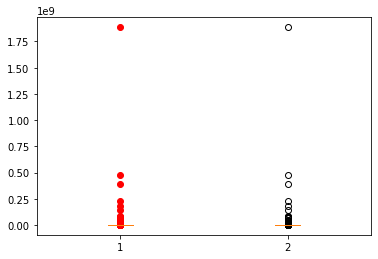

In [15]:
def detect_outliers_iqr(ds, iqr_factor=1.5):
    q1 = np.percentile(ds, 25, axis=0)
    q3 = np.percentile(ds, 75, axis=0)
    iqr = q3 - q1
    upper_bound = q3 + iqr_factor * iqr
    lower_bound = q1 - iqr_factor * iqr
    outliers = np.concatenate([ds[(ds > upper_bound) | (ds < lower_bound)]])
    return outliers

# Detect outliers using IQR
outliers = detect_outliers_iqr(ds)

# Plot the ds and outliers
fig, ax = plt.subplots()
ax.boxplot(ds)
ax.plot(np.ones_like(outliers), outliers, 'ro')
plt.show()

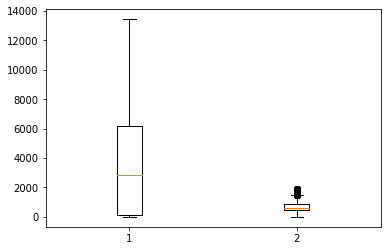

In [16]:
def remove_outliers_iqr(ds, iqr_factor=1.5):
    q1 = np.percentile(ds, 25, axis=0)
    q3 = np.percentile(ds, 75, axis=0)
    iqr = q3 - q1
    upper_bound = q3 + iqr_factor * iqr
    lower_bound = q1 - iqr_factor * iqr
    mask = np.all((ds > lower_bound) & (ds < upper_bound), axis=1)
    cleaned_ds = ds[mask]
    return cleaned_ds

# Remove outliers using IQR
cleaned_ds = remove_outliers_iqr(ds)

# Plot the cleaned ds using a box plot
fig, ax = plt.subplots()
ax.boxplot(cleaned_ds)
plt.show()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf

pipeline = Pipeline([

    ('reshape', FunctionTransformer(lambda x: x.values.reshape(-1, 1))),
    ('scaler', StandardScaler())
])


X_train, X_test, y_train, y_test = train_test_split(cleaned_ds.iloc[:, :-1], cleaned_ds.iloc[:, -1], test_size=0.2, random_state=42)
model=RandomForestRegressor(n_estimators=4,max_depth=4)
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)


In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1)

# Fit the model to the training data
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test_preprocessed)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 103451.23


In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression()
lasso = Lasso(alpha=0.5)
ridge = Ridge(alpha=0.5)

lr.fit(X_train_preprocessed, y_train)
lasso.fit(X_train_preprocessed, y_train)
ridge.fit(X_train_preprocessed, y_train)

y_lr_pred = lr.predict(X_test_preprocessed)
y_lasso_pred = lasso.predict(X_test_preprocessed)
y_ridge_pred = ridge.predict(X_test_preprocessed)

mse_lr = mean_squared_error(y_test, y_lr_pred)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)



In [27]:
print(mse_lr)
print(mse_lasso)
print(mse_ridge)

137990.8742476833
137991.9593882791
137990.87424951236
